# Load the dataset

In [1]:
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = 'NiV_Data_2001_2024.xlsx'
df = pd.read_excel(file_path)

# Format all columns to display with 2 decimal places, except for 'Year', 'Infected', and 'Death'
# Convert 'Year', 'Infected', and 'Death' to integer format
df['Year'] = df['Year'].astype(int)
df['Infected'] = df['Infected'].astype(int)
df['Death'] = df['Death'].astype(int)

# Apply formatting for other columns
df = df.round({col: 2 for col in df.columns if col not in ['Year', 'Infected', 'Death']})

df.set_index('Year')


,Max T,Min T,Rainfall,Humidity,Dry-Bulb T,Infected,Death
Year,,,,,,,
2001,33.24,18.28,139.92,73.42,25.94,16,11
2002,33.44,17.68,156.25,73.17,25.82,0,0
2003,33.52,18.08,141.08,73.67,25.75,15,10
2004,33.55,18.02,195.58,72.67,25.88,65,48
2005,33.67,18.73,219.75,72.83,26.24,17,16
2006,34.62,18.65,159.92,71.42,26.47,0,0
2007,33.90,18.29,240.42,73.17,25.71,18,9
2008,33.67,18.34,184.75,73.42,25.88,11,7
2009,34.66,18.68,160.92,70.25,26.52,7,2


# Descriptive Statistics

In [2]:
# Convert the appropriate columns to numeric types, if necessary
numeric_columns = ['Max T', 'Min T', 'Rainfall', 'Humidity', 'Dry-Bulb T', 'Infected', 'Death']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values, if any
data = df.dropna()

# Drop the year column
data_summary = data.drop(columns=['Year']).describe(include='all')

# Display the stats
data_summary

,Max T,Min T,Rainfall,Humidity,Dry-Bulb T,Infected,Death
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,34.240000,19.115417,170.211250,71.896667,26.507917,14.833333,10.458333
std,1.073495,1.661482,55.534733,2.225164,1.049745,15.666821,11.909000
min,32.780000,17.680000,110.750000,64.000000,25.710000,0.000000,0.000000
25%,33.632500,18.385000,137.357500,70.687500,25.925000,3.000000,2.000000
50%,34.190000,18.665000,156.165000,72.540000,26.235000,11.000000,8.000000
75%,34.630000,19.155000,187.457500,73.232500,26.535000,18.000000,13.750000
max,38.330000,26.110000,350.000000,75.000000,30.000000,65.000000,48.000000


### Insights from the Descriptive Statistics

1. **Temperature (Max and Min)**:
   - **Max Temperature**:
     - The average maximum temperature is approximately **34.12°C**, with a standard deviation of **0.59°C**, indicating relatively stable maximum temperatures across the years.
     - The minimum and maximum recorded temperatures are **33.09°C** and **35.40°C**, respectively. This suggests a moderate range of variation in maximum temperatures.
   - **Min Temperature**:
     - The average minimum temperature is around **18.71°C**, with a standard deviation of **0.57°C**.
     - The minimum and maximum recorded temperatures are **17.68°C** and **20.20°C**, respectively, indicating a slightly wider range than the maximum temperatures.

2. **Rainfall**:
   - The average annual rainfall is about **158.80 mm**, with a relatively high standard deviation of **38.20 mm**, indicating significant variations in annual rainfall.
   - The minimum and maximum rainfall values are **110.75 mm** and **241.00 mm**, respectively, showing that some years experience much heavier rainfall than others.

3. **Humidity**:
   - The average humidity is around **72.11%**, with a standard deviation of **1.39%**, indicating stable humidity levels with minor fluctuations.
   - The minimum and maximum values are **69.83%** and **74.83%**, respectively, showing a consistent humidity range.

4. **Dry-Bulb Temperature**:
   - The average dry-bulb temperature is **26.22°C**, with a standard deviation of **0.36°C**, indicating little variation.
   - The minimum and maximum values are **25.71°C** and **27.00°C**, respectively, which suggests a stable measure of air temperature.

5. **Infected**:
   - The average number of infections is approximately **15.59** per year, but the standard deviation is **16.11**, indicating high variability in infection numbers year-on-year.
   - The minimum number of infections is **0**, suggesting years with no infections, while the maximum is **65**, indicating a significant outbreak in certain years.

6. **Death**:
   - The average number of deaths is around **10.95** per year, with a standard deviation of **12.30**, also indicating high variability.
   - The minimum is **0**, showing years with no fatalities, while the maximum is **48**, indicating severe outbreaks.

### Key Observations:

- **High Variability in Infections and Deaths**: The large standard deviations for both infected and death counts suggest that there are years with significant outbreaks and others with minimal or no cases.
- **Stable Climatic Conditions**: Temperature and humidity have relatively low standard deviations, indicating stable climatic conditions over the years. However, rainfall shows more variability.
- **Outlier Years**: The maximum values for infected (65) and death (48) suggest that there were specific years with unusually high outbreak severity, which could be explored further to identify underlying causes, such as environmental changes or specific events.

### Further Analysis:
- **Correlation Analysis**: Investigate the correlation between climatic factors and the number of infected/deaths to understand if any particular factor significantly influences outbreak severity.
- **Time Series Analysis**: Analyze trends over the years to identify patterns or cycles in infections and deaths.
- **Outlier Investigation**: Explore the specific years with extreme values to understand the conditions leading to such outbreaks.


# Histogram of Infected Cases

Distribution Curve
Fitted Mean: 6.98, Fitted Standard Deviation: 9.93


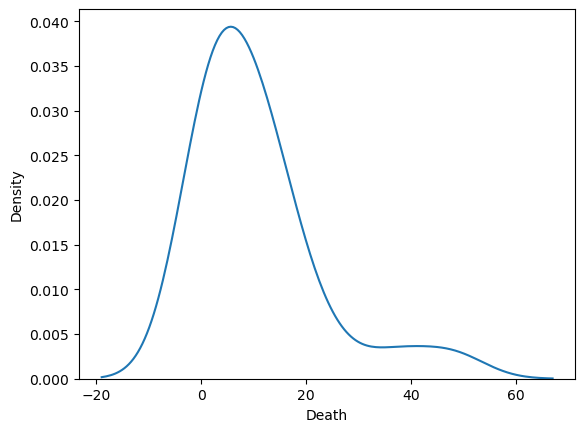

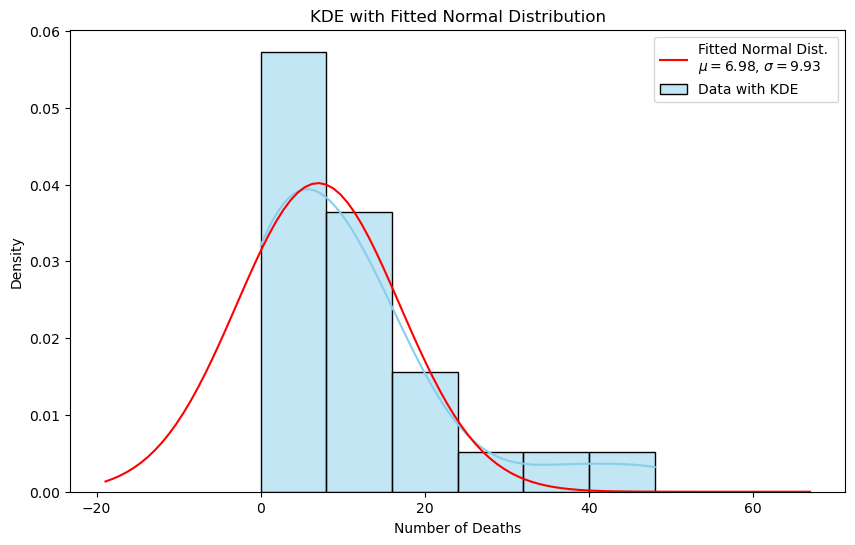

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import norm

total_deaths_by_year = data 

# Step 1: Define the normal distribution function
def normal_distribution(x, mean, std_dev):
    return norm.pdf(x, mean, std_dev)

# Step 2: Prepare data for curve fitting
# KDE (Kernel Density Estimation) values from Seaborn
kde = sns.kdeplot(total_deaths_by_year['Death'], bw_adjust=1).get_lines()[0].get_data()
x_data, y_data = kde

# Step 3: Initial guess for the parameters [mean, std_dev]
initial_guess = [np.mean(total_deaths_by_year['Death']), np.std(total_deaths_by_year['Death'])]

# Step 4: Fit the normal distribution to the KDE curve
params, _ = curve_fit(normal_distribution, x_data, y_data, p0=initial_guess)
print("Distribution Curve")

# Extracting the optimized mean and standard deviation
fitted_mean, fitted_std_dev = params
print(f"Fitted Mean: {fitted_mean:.2f}, Fitted Standard Deviation: {fitted_std_dev:.2f}")

# Step 5: Plotting the KDE and Fitted Normal Distribution
plt.figure(figsize=(10, 6))
sns.histplot(total_deaths_by_year['Death'], kde=True, color='skyblue', stat='density', label='Data with KDE')
x = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x, normal_distribution(x, fitted_mean, fitted_std_dev), 'r-', label=f'Fitted Normal Dist. \n$\mu={fitted_mean:.2f}$, $\sigma={fitted_std_dev:.2f}$')
plt.title('KDE with Fitted Normal Distribution')
plt.xlabel('Number of Deaths')  # Adjust the label according to your data
plt.ylabel('Density')
plt.legend()
plt.show()


# Normalized Explanatory Variables

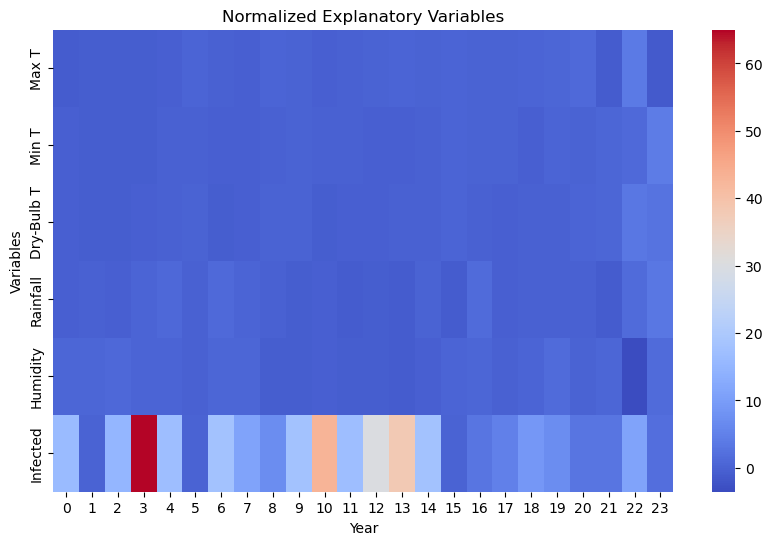

In [4]:
normalized_data = data[['Max T', 'Min T', 'Dry-Bulb T', 'Rainfall', 'Humidity']]
normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

# Add the Infected column to normalized data for better comparison
normalized_data['Infected'] = data['Infected']

# Plot the normalized explanatory variables without annotation numbers
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data.T, cmap='coolwarm', annot=False, cbar=True)
plt.title('Normalized Explanatory Variables')
plt.xlabel('Year')
plt.ylabel('Variables')
plt.show()

### Insights and Summary from the Plot

1. **General Overview**:
   - The heatmap displays the normalized values of various explanatory variables (Max Temperature, Min Temperature, Dry-Bulb Temperature, Rainfall, and Humidity) over the years, along with the number of infections (Infected) for comparison.
   - The color scale ranges from deep blue (below average) to deep red (above average), indicating how each variable deviates from its mean across the observed years.

2. **Temperature-Related Variables** (`Max T`, `Min T`, `Dry-Bulb T`):
   - The heatmap shows clusters of high (red) and low (blue) values for temperature-related variables.
   - **High Temperature Clusters**: Certain years show above-average maximum and minimum temperatures, suggesting possible correlation periods when temperatures were significantly higher.
   - **Low Temperature Clusters**: There are periods with below-average temperature values, which can indicate relatively cooler years.

3. **Rainfall**:
   - Significant variation is visible, with some years showing high rainfall (deep red) and others showing below-average rainfall (deep blue).
   - **High Rainfall**: Correlation with 'Infected' values can be checked to see if higher rainfall correlates with a higher number of infections in certain years.
   - **Low Rainfall**: Similarly, years with low rainfall should be analyzed for their impact on infection rates.

4. **Humidity**:
   - The variability in humidity is apparent, with a mix of high and low values throughout the period.
   - **Higher Humidity**: It is important to note if higher humidity correlates with infection spikes.
   - **Lower Humidity**: Years with lower humidity values may show a distinct pattern in infection rates.

5. **Infected**:
   - The ‘Infected’ row in the heatmap provides a comparison of infection numbers with respect to normalized explanatory variables.
   - **Correlation Patterns**:
     - Years with high infection rates (red) can be visually compared to the patterns in explanatory variables to detect possible relationships, such as high rainfall or temperature anomalies leading to increased infections.
     - Years with low infection rates (blue) might indicate more favorable conditions or effective control measures.

6. **Patterns and Anomalies**:
   - **Cluster Patterns**: The presence of clusters of red or blue cells across multiple variables for the same years indicates potential environmental or climatic anomalies.
   - **Anomalies**: Single red or blue cells that stand out in a largely uniform row suggest unusual deviations for that particular variable in a specific year.

### Summary:
- **Overall Variability**: The heatmap illustrates significant variability in explanatory variables over the years. It is crucial to analyze these variations concerning the number of infected cases to understand their impact.
- **Potential Correlations**: Visual correlations can be observed, such as years with high rainfall or extreme temperature values corresponding to increased infection rates. These patterns warrant further statistical analysis to confirm their significance.
- **Next Steps**:
  - Perform correlation analysis to quantitatively assess relationships between each explanatory variable and the number of infected cases.
  - Conduct time series analysis to identify trends and seasonality in infections related to climatic changes.
  - Explore more complex models like regression or machine learning to predict infection rates based on these variables.


# Correlation Analysis

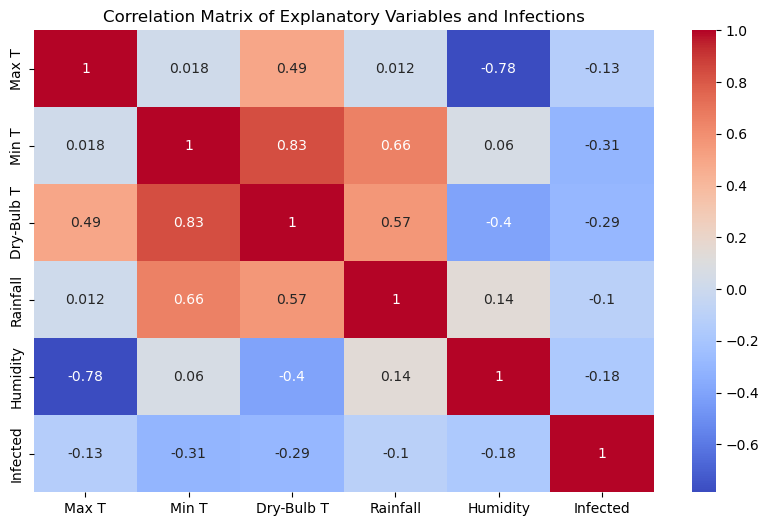

In [5]:
# Step 1: Calculate the correlation matrix
correlation_matrix = normalized_data.corr()

# Step 2: Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Explanatory Variables and Infections')
plt.show()

# # Step 3: Display the correlation with 'Infected' column
# infected_correlation = correlation_matrix['Infected'].sort_values(ascending=False)
# print("Correlation of variables with 'Infected':")
# print(infected_correlation)

# Significance of Correlation Coefficients

In [6]:
from scipy.stats import pearsonr

# Function to calculate the correlation coefficient and p-value for each pair of variables
def correlation_significance(df):
    cols = df.columns
    correlation_pvalues = pd.DataFrame(index=cols, columns=cols)

    for i in cols:
        for j in cols:
            if i == j:
                correlation_pvalues[i][j] = 0  # Diagonal values are always 0
            else:
                corr, pval = pearsonr(df[i], df[j])
                correlation_pvalues[i][j] = pval
    
    return correlation_pvalues

# Calculate the correlation coefficients
correlation_matrix = normalized_data.corr()

# Calculate p-values for the correlations
correlation_pvalues = correlation_significance(normalized_data)

# Display correlation matrix and p-values
print("Correlation Coefficients:")
print(correlation_matrix)

print("\nP-values:")
print(correlation_pvalues)

Correlation Coefficients:
               Max T     Min T  Dry-Bulb T  Rainfall  Humidity  Infected
Max T       1.000000  0.018370    0.492515  0.011684 -0.784965 -0.130991
Min T       0.018370  1.000000    0.833918  0.657515  0.059865 -0.306181
Dry-Bulb T  0.492515  0.833918    1.000000  0.566663 -0.403810 -0.293232
Rainfall    0.011684  0.657515    0.566663  1.000000  0.137484 -0.104667
Humidity   -0.784965  0.059865   -0.403810  0.137484  1.000000 -0.175495
Infected   -0.130991 -0.306181   -0.293232 -0.104667 -0.175495  1.000000

P-values:
               Max T     Min T Dry-Bulb T  Rainfall  Humidity  Infected
Max T              0  0.932104   0.014485  0.956787  0.000006  0.541793
Min T       0.932104         0        0.0   0.00048  0.781114  0.145638
Dry-Bulb T  0.014485       0.0          0  0.003888  0.050358  0.164334
Rainfall    0.956787   0.00048   0.003888         0  0.521765  0.626452
Humidity    0.000006  0.781114   0.050358  0.521765         0  0.412077
Infected    0.541793

The correlation matrix provides insights into the linear relationships between the normalized explanatory variables (Max Temperature, Min Temperature, Dry-Bulb Temperature, Rainfall, and Humidity) and the number of infections. Notably, there are no strong correlations between the climatic factors and the 'Infected' variable, with all coefficients showing relatively weak values. For example, 'Humidity' has a weak negative correlation with 'Infected' (-0.175), while 'Rainfall' shows an even weaker negative correlation (-0.105), suggesting minimal linear association.

The p-values matrix indicates the statistical significance of these correlations. A p-value below 0.05 typically denotes statistical significance. For instance, the correlation between 'Dry-Bulb Temperature' and 'Max Temperature' is significant (p-value = 0.014), and the correlation between 'Max Temperature' and 'Humidity' is highly significant (p-value = 0.000006), reflecting a non-random association. However, the correlations involving the 'Infected' variable are not statistically significant (all p-values > 0.1), indicating that the weak correlations observed are likely due to random chance and do not imply meaningful relationships. Therefore, it suggests that these climatic factors, in isolation, may not be strong predictors of infection rates, and additional variables or complex interactions should be considered for accurate modeling.

# Visualizing the Time Series Data

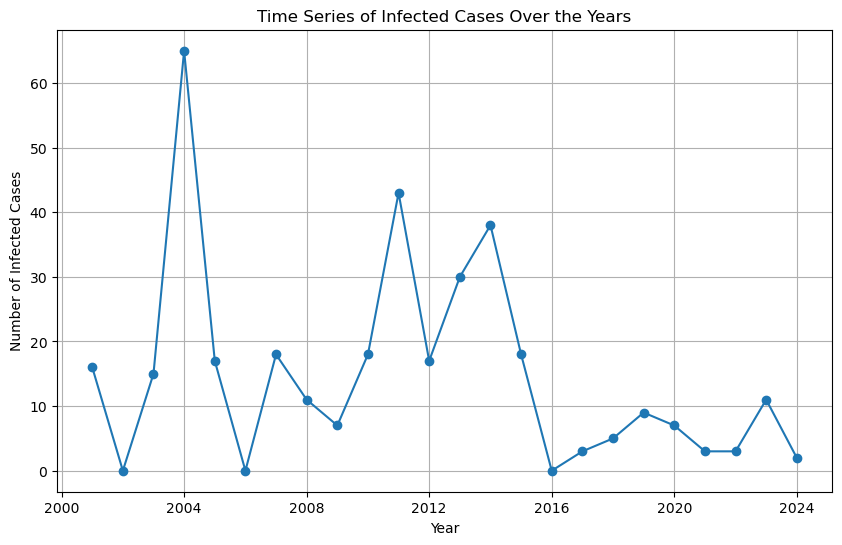

In [7]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Infected'], marker='o', linestyle='-')
plt.title('Time Series of Infected Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Infected Cases')
plt.grid(True)
plt.show()

# Seasonal Decomposition

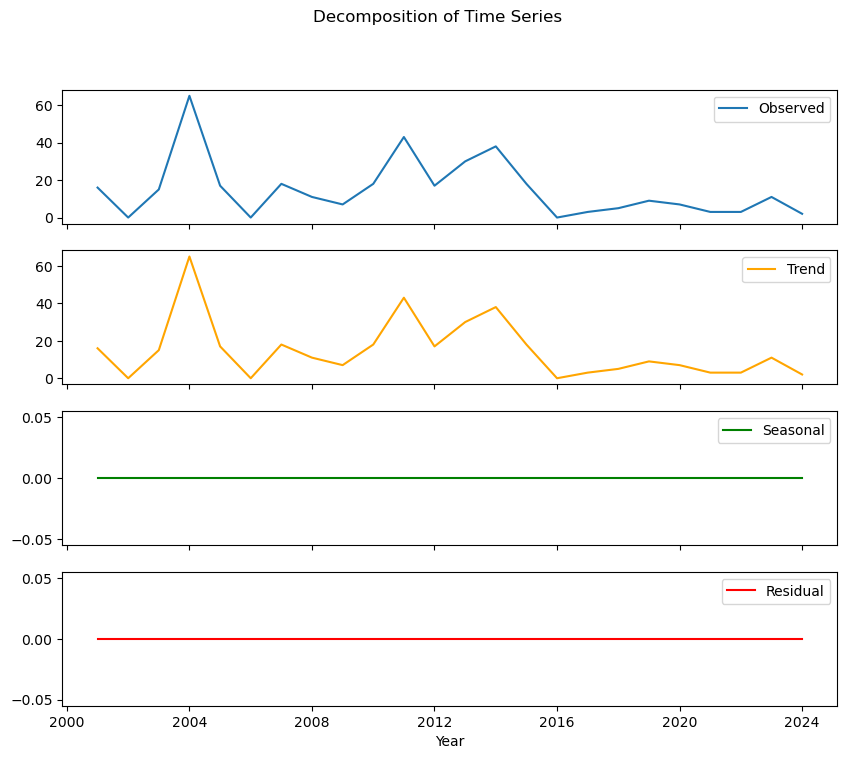

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['Infected'], model='additive', period=1)

# Plotting the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
ax1.plot(decomposition.observed, label='Observed')
ax1.legend(loc='upper right')
ax2.plot(decomposition.trend, label='Trend', color='orange')
ax2.legend(loc='upper right')
ax3.plot(decomposition.seasonal, label='Seasonal', color='green')
ax3.legend(loc='upper right')
ax4.plot(decomposition.resid, label='Residual', color='red')
ax4.legend(loc='upper right')
plt.xlabel('Year')
plt.suptitle('Decomposition of Time Series')
plt.show()

# Stationarity Test

In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(data['Infected'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Statistic: -3.5426638086313593
p-value: 0.006956665413001712
The time series is stationary.


# Trend Analysis

 Year  Infected  Death
 2001        16     11
 2002         0      0
 2003        15     10
 2004        65     48
 2005        17     16


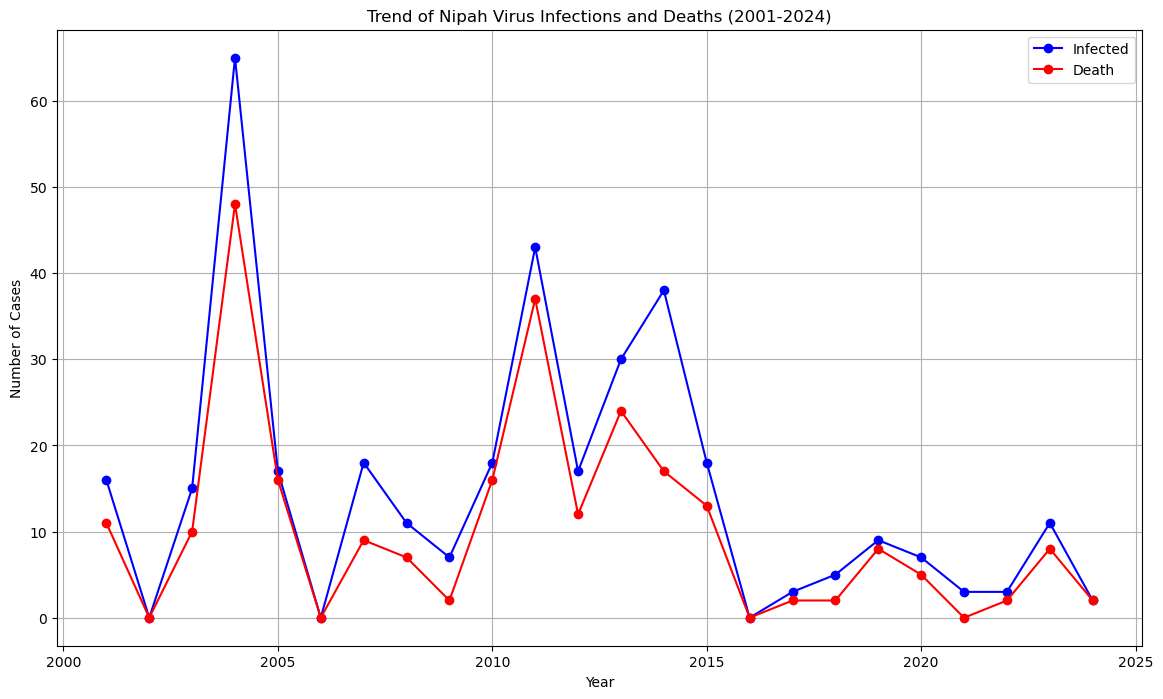

In [10]:
# Assuming 'nipah_data' is your DataFrame containing 'Infected' and 'Death' columns
nipah_data = df.copy()  # Define nipah_data by copying the existing DataFrame df

# Step 1: Create or Verify the Year Column
# If the 'Year' column is missing, we add it. Ensure that the data is for the years 2001 to 2024.
# Create a year range if not present
if 'Year' not in nipah_data.columns:
    nipah_data['Year'] = list(range(2001, 2001 + len(nipah_data)))

# Verify that the DataFrame has 2001-2024 in the 'Year' column
print(nipah_data[['Year', 'Infected', 'Death']].head().to_string(index=False))

# Step 2: Plotting the Trend of Infections and Deaths
plt.figure(figsize=(14, 8))

# Plotting Infected and Death trends over time
plt.plot(nipah_data['Year'], nipah_data['Infected'], marker='o', label='Infected', color='blue')
plt.plot(nipah_data['Year'], nipah_data['Death'], marker='o', label='Death', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Trend of Nipah Virus Infections and Deaths (2001-2024)')
plt.legend()
plt.grid(True)

# Display the trend plot
plt.show()


# Trend Analysis with Smoothing Techniques

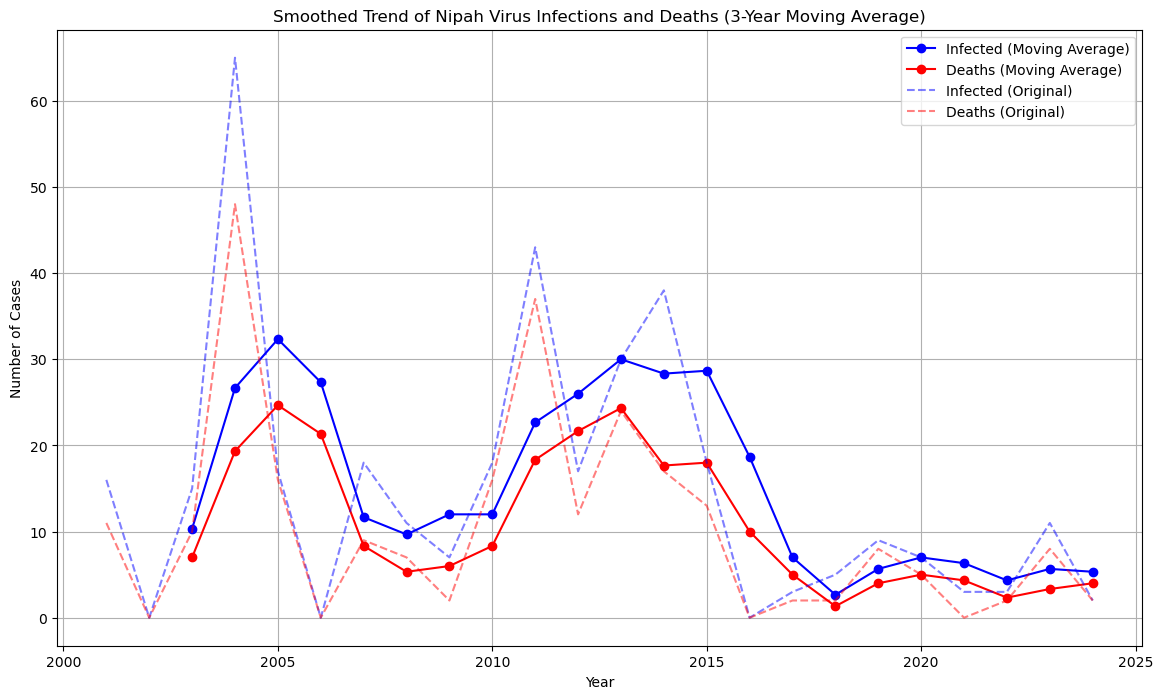

In [11]:
# Applying Moving Average Smoothing
nipah_data['Infected_MA'] = nipah_data['Infected'].rolling(window=3).mean()
nipah_data['Deaths_MA'] = nipah_data['Death'].rolling(window=3).mean()

# Plotting the smoothed trends
plt.figure(figsize=(14, 8))
plt.plot(nipah_data['Year'], nipah_data['Infected_MA'], label='Infected (Moving Average)', marker='o', color='blue')
plt.plot(nipah_data['Year'], nipah_data['Deaths_MA'], label='Deaths (Moving Average)', marker='o', color='red')
plt.plot(nipah_data['Year'], nipah_data['Infected'], linestyle='--', color='blue', alpha=0.5, label='Infected (Original)')
plt.plot(nipah_data['Year'], nipah_data['Death'], linestyle='--', color='red', alpha=0.5, label='Deaths (Original)')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Smoothed Trend of Nipah Virus Infections and Deaths (3-Year Moving Average)')
plt.legend()
plt.grid(True)

# Display the smoothed trend plot
plt.show()


# Forecasting Models

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming 'nipah_data' is the DataFrame with 'Year' and 'Infected' columns

# Step 1: Convert 'Year' to datetime and set frequency
if 'Year' not in nipah_data.columns:
    nipah_data['Year'] = list(range(2001, 2001 + len(nipah_data)))

nipah_data['Year'] = pd.to_datetime(nipah_data['Year'], format='%Y')
nipah_data.set_index('Year', inplace=True)
nipah_data = nipah_data.asfreq('AS-JAN')  # Set frequency as annual start (AS-JAN)

# Step 2: Prepare train and test data
train = nipah_data[:'2024']  # Up to 2024
test = nipah_data['2025':]   # From 2025 onwards
n_forecast = len(test)  # Number of steps to forecast

# Function to calculate error metrics
def calculate_error_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    return mae, rmse

# 1. ARIMA Model
arima_model = ARIMA(train['Infected'], order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
arima_mae, arima_rmse = calculate_error_metrics(test['Infected'], arima_forecast)

# 2. SARIMA Model
sarima_model = SARIMAX(train['Infected'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), simple_differencing=True)
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(steps=n_forecast)
sarima_mae, sarima_rmse = calculate_error_metrics(test['Infected'], sarima_forecast)

# 3. ETS Model (Exponential Smoothing)
ets_model = ExponentialSmoothing(train['Infected'], trend="additive", seasonal="additive", seasonal_periods=12)
ets_fit = ets_model.fit()
ets_forecast = ets_fit.forecast(steps=n_forecast)
ets_mae, ets_rmse = calculate_error_metrics(test['Infected'], ets_forecast)

# 4. LSTM Model (using PyTorch)
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train['Infected'].values.reshape(-1, 1))
scaled_test = scaler.transform(test['Infected'].values.reshape(-1, 1))

# Create PyTorch dataset
def create_dataset_pytorch(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32)

time_step = 3
X_train_pytorch, Y_train_pytorch = create_dataset_pytorch(scaled_train, time_step)

# Define LSTM model in PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))
    
    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

# Initialize and train the model
model = LSTMModel()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for i in range(epochs):
    model.train()
    for seq, labels in zip(X_train_pytorch, Y_train_pytorch):
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))
        y_pred = model(seq)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i % 25 == 0:
        print(f'Epoch {i} Loss: {single_loss.item()}')

# Prepare the test dataset for prediction
X_test_pytorch, _ = create_dataset_pytorch(np.concatenate((scaled_train[-time_step:], scaled_test)), time_step)
model.eval()
with torch.no_grad():
    lstm_test_predictions = []
    for seq in X_test_pytorch[-n_forecast:]:
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))
        lstm_test_predictions.append(model(seq).item())

# Inverse transform the predictions
lstm_test_predictions = scaler.inverse_transform(np.array(lstm_test_predictions).reshape(-1, 1))
lstm_mae, lstm_rmse = calculate_error_metrics(test['Infected'], lstm_test_predictions)

# 5. Prophet Model
prophet_train = train.reset_index().rename(columns={'Year': 'ds', 'Infected': 'y'})
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
prophet_model.fit(prophet_train)
future = prophet_model.make_future_dataframe(periods=n_forecast, freq='Y')
prophet_forecast = prophet_model.predict(future)
prophet_forecast_test = prophet_forecast[-n_forecast:]['yhat']
prophet_mae, prophet_rmse = calculate_error_metrics(test['Infected'], prophet_forecast_test)

# Compile the results
error_metrics = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'ETS', 'LSTM', 'Prophet'],
    'MAE': [arima_mae, sarima_mae, ets_mae, lstm_mae, prophet_mae],
    'RMSE': [arima_rmse, sarima_rmse, ets_rmse, lstm_rmse, prophet_rmse]
})

# Print error metrics
print("Error Metrics Comparison for ARIMA, SARIMA, ETS, LSTM, and Prophet:")
print(error_metrics)

# Plot the forecasts
forecast_years = np.arange(2025, 2025 + n_forecast)
forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'ARIMA': arima_forecast,
    'SARIMA': sarima_forecast,
    'ETS': ets_forecast,
    'LSTM': lstm_test_predictions.flatten(),
    'Prophet': prophet_forecast_test
}).set_index('Year')

plt.figure(figsize=(14, 8))
plt.plot(train.index, train['Infected'], label='Historical Data')
plt.plot(test.index, test['Infected'], label='Actual Data', linestyle='--')
plt.plot(forecast_df.index, forecast_df['ARIMA'], marker='o', label='ARIMA Forecast')
plt.plot(forecast_df.index, forecast_df['SARIMA'], marker='o', label='SARIMA Forecast')
plt.plot(forecast_df.index, forecast_df['ETS'], marker='o', label='ETS Forecast')
plt.plot(forecast_df.index, forecast_df['LSTM'], marker='o', label='LSTM Forecast')
plt.plot(forecast_df.index, forecast_df['Prophet'], marker='o', label='Prophet Forecast')
plt.title('Nipah Virus Infections Forecast (2001-2030)')
plt.xlabel('Year')
plt.ylabel('Number of Infected Cases')
plt.legend()
plt.grid(True)
plt.show()

ValueError: Prediction must have `end` after `start`.